In [60]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [40]:
df.experience = df.experience.fillna('zero')
df.experience

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [43]:
df['experience'] = df['experience'].astype(str)
df['experience'] = df['experience'].apply(w2n.word_to_num)
df['experience']


0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [48]:
import math
score_test = math.floor(df['test_score(out of 10)'].mean())
score_test

7

In [51]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(score_test)
df['test_score(out of 10)']

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     7.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [54]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)','interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [55]:
reg.predict([[2, 9, 6]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [56]:
reg.predict([[12, 10, 10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

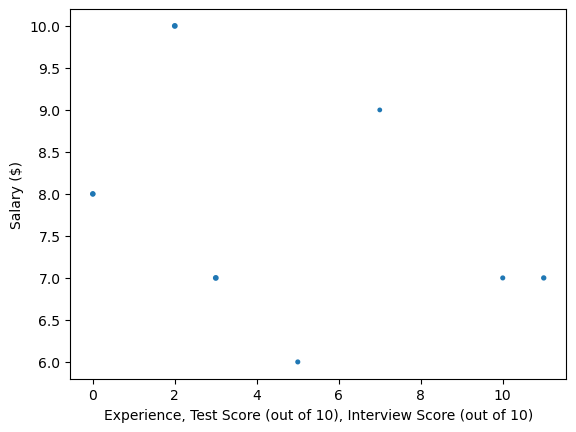

In [61]:
plt.xlabel('Experience, Test Score (out of 10), Interview Score (out of 10)')
plt.ylabel('Salary ($)')
plt.scatter(df.experience, df['test_score(out of 10)'], df['interview_score(out of 10)'])
plt.show()
